**Decision Tree Classification to a dataset, analysed the performance of the model, and interpreted the results.**

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
    confusion_matrix, RocCurveDisplay )
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
df = pd.read_excel("heart_disease.xlsx")  

In [4]:
print(df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


# Exploratory Data Analysis (EDA)

In [5]:
# Data Structure
print(df.shape)
print(df.info())
print(df.describe())

(908, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253  

In [6]:
# Missing Values
df.isnull().sum()
# No missing values exits

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# fill missing values if any
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
# Numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

**Histogram**

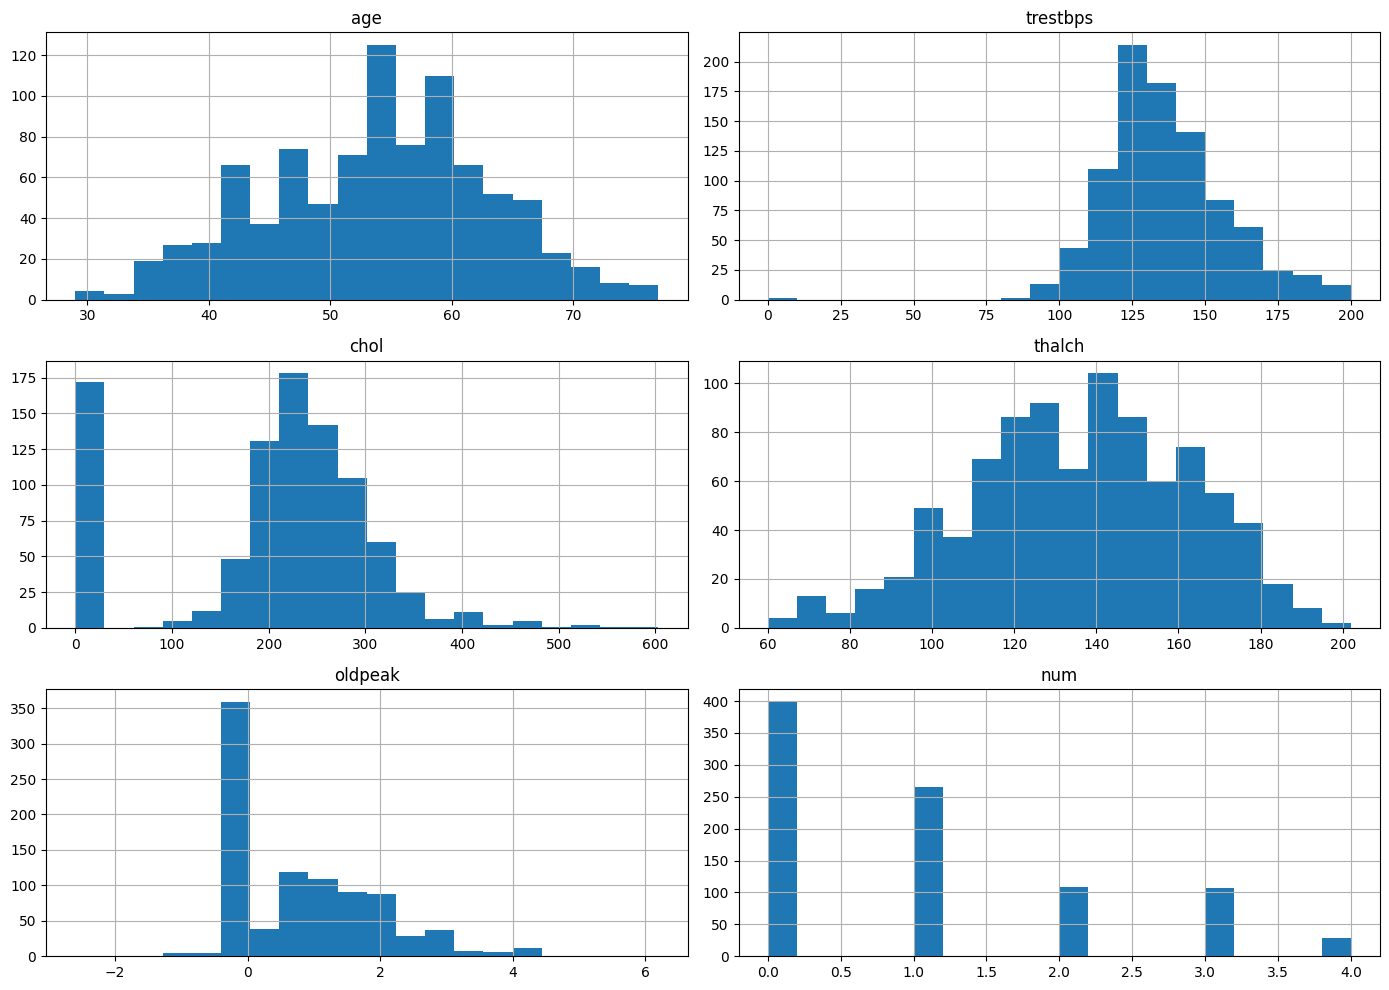

In [9]:
# Histograms for distribution of numeric columns
numeric_df.hist(figsize=(14,10), bins=20)
plt.tight_layout()
plt.show()

**Boxplots**

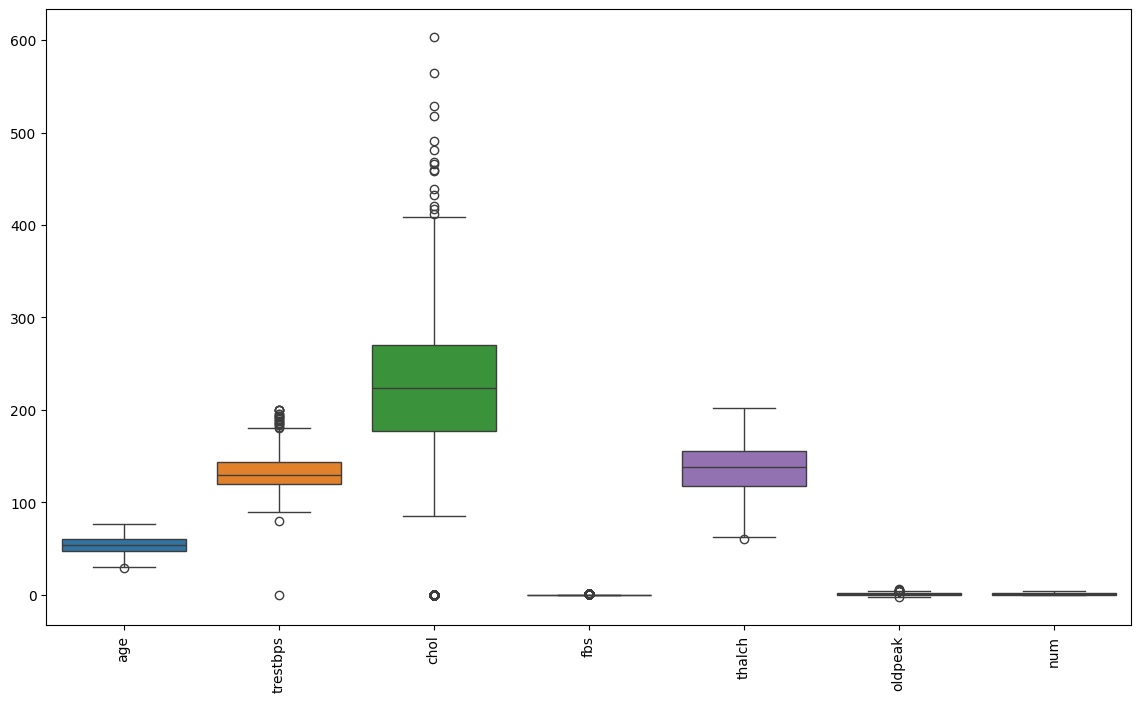

In [10]:
# Boxplots for outliers
plt.figure(figsize=(14,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


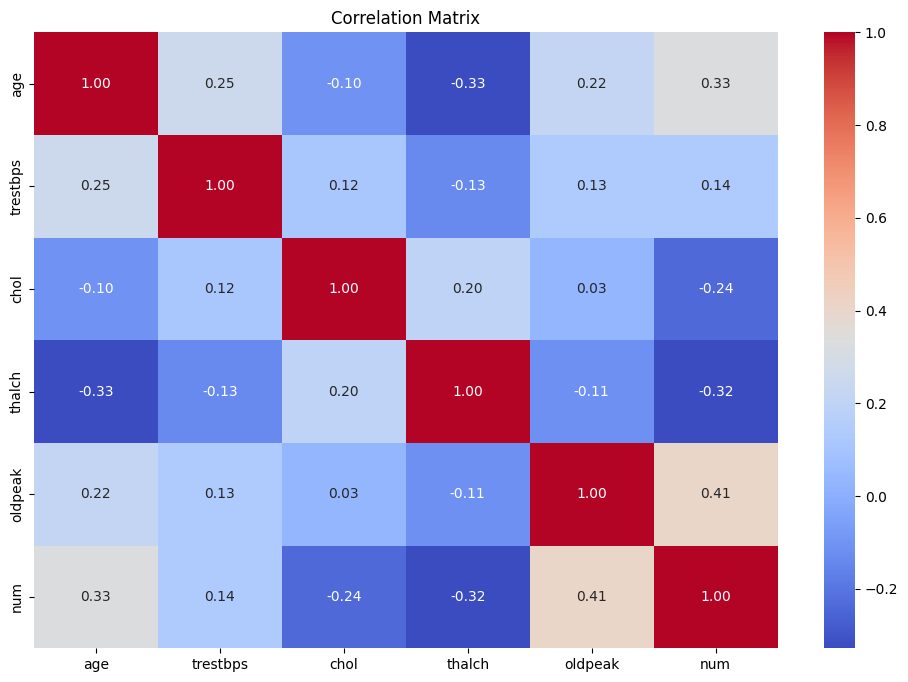

In [11]:
# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Feature Engineering

In [12]:
# Convert target to binary classification:
df["num"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

In [13]:
# Convert boolean columns to integers
bool_cols = df.select_dtypes(include="bool").columns
df[bool_cols] = df[bool_cols].astype(int)

# One-Hot Encode categorical columns
cat_cols = df.select_dtypes(include="object").columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [14]:
# Features and Target
X = df.drop("num", axis=1)   # Features
y = df["num"]                # Target

# Decision Tree Classification

In [15]:
# rain-Test Split (80–20)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
# Model Evaluation
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.7142857142857143
Precision: 0.7659574468085106
Recall   : 0.7058823529411765
F1 Score : 0.7346938775510204
ROC-AUC  : 0.7154411764705882

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.72      0.69        80
           1       0.77      0.71      0.73       102

    accuracy                           0.71       182
   macro avg       0.71      0.72      0.71       182
weighted avg       0.72      0.71      0.72       182



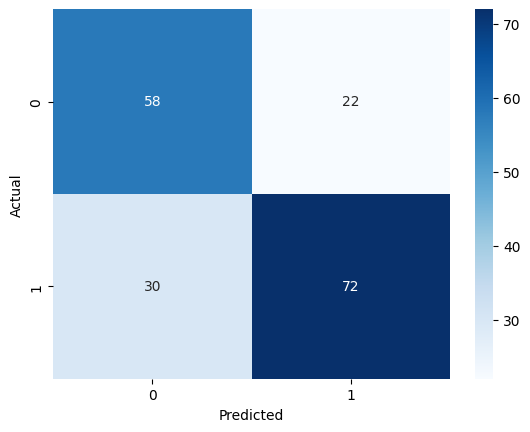

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

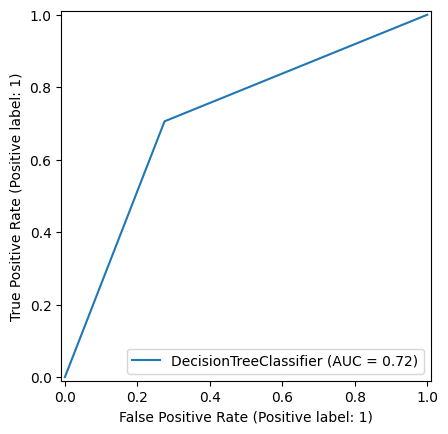

In [19]:
# ROC Curve
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.show()

# Hyperparameter Tuning

In [20]:
# Gride search
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [21]:
# Best model
best_dt = grid.best_estimator_
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [22]:
# Evaluation of Tuned Model
y_pred_best = best_dt.predict(X_test)
y_prob_best = best_dt.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob_best))

Accuracy : 0.7637362637362637
Precision: 0.780952380952381
Recall   : 0.803921568627451
F1 Score : 0.7922705314009661
ROC-AUC  : 0.8049019607843138


# Model Evaluation and Analysis

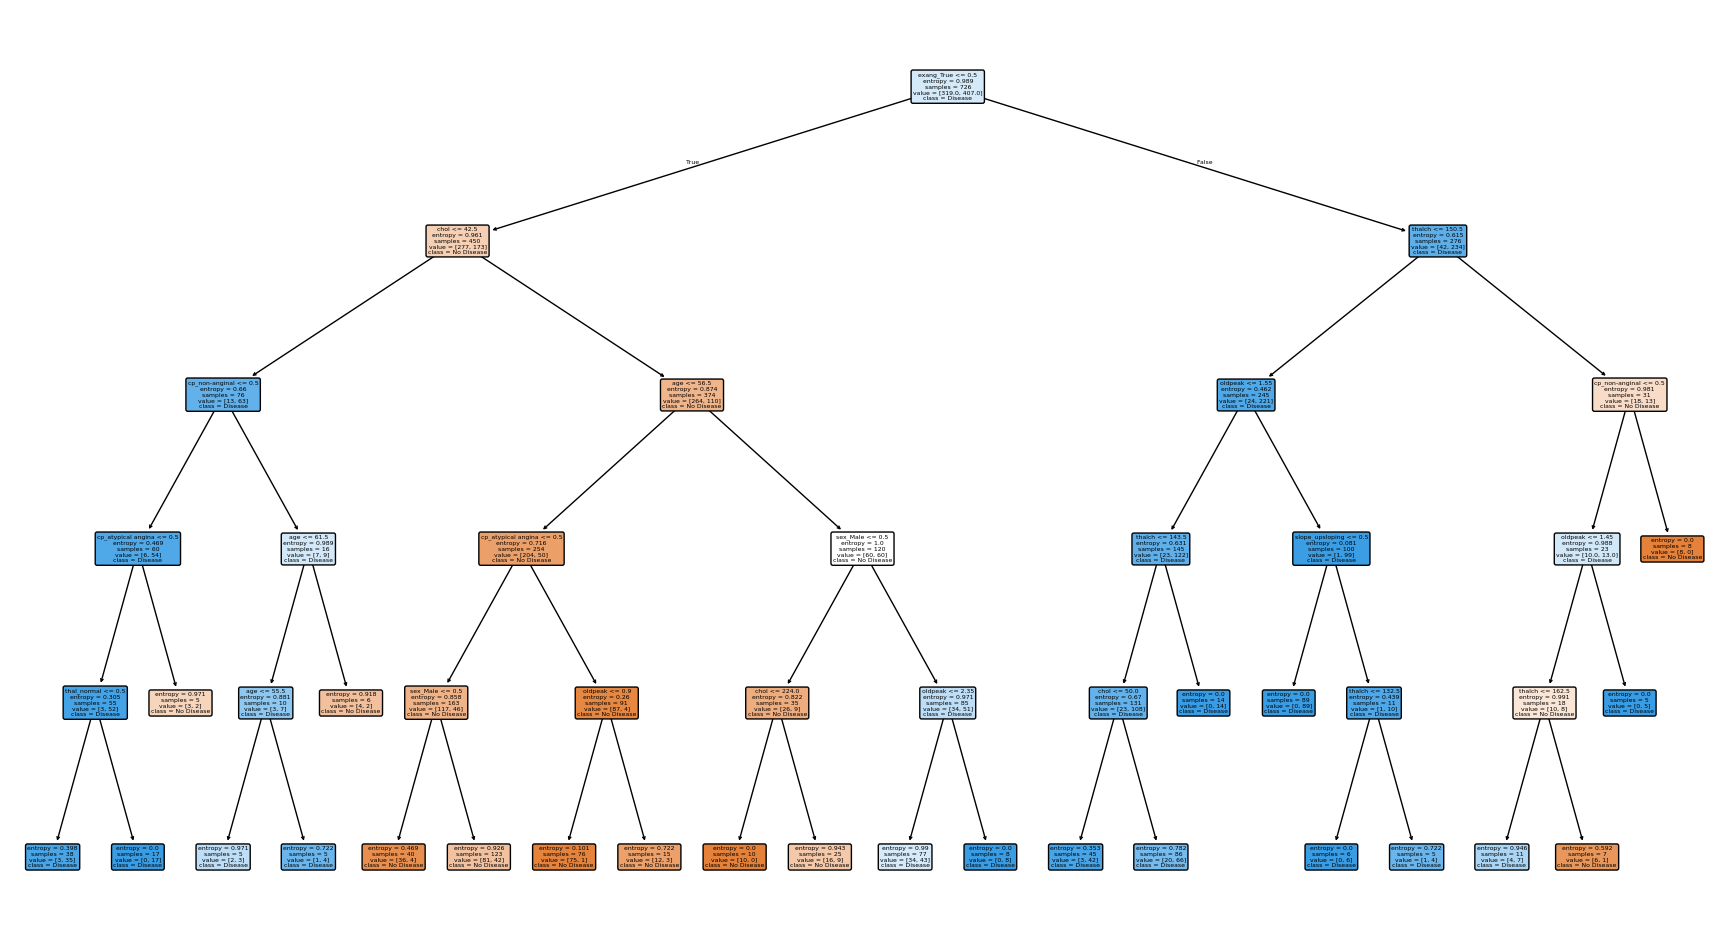

In [23]:
# Visualizing the Decision Tree
plt.figure(figsize=(22,12))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)
plt.show()

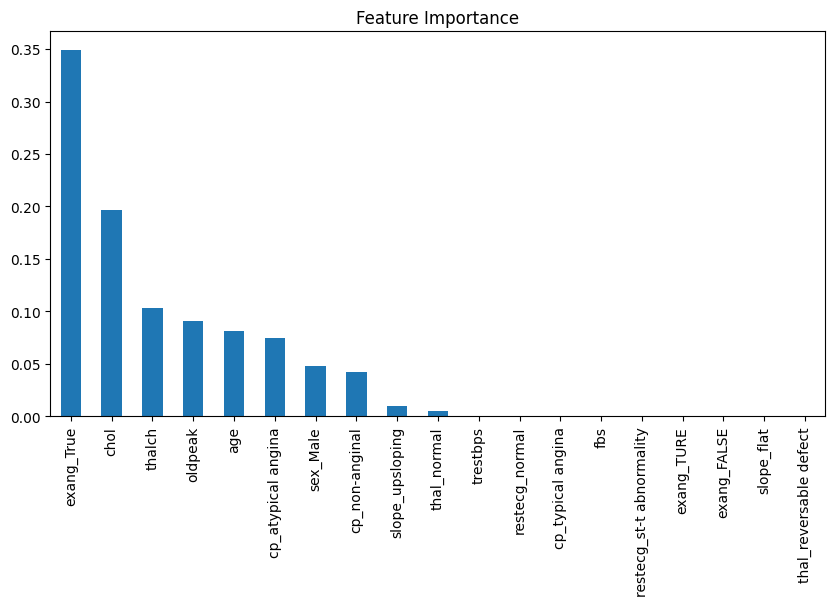

In [24]:
# Feature Importance
importance = pd.Series(
    best_dt.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance")
plt.show()

# Final Interpretation 

The Decision Tree model successfully classified patients into heart disease and no heart disease categories.

Hyperparameter tuning reduced overfitting and improved generalization.

Features such as chest pain type, maximum heart rate, ST depression, and age were found to be most influential.

Decision Trees offer high interpretability, making them suitable for medical decision support systems.

**Conclusion**

Decision Tree Classification proved effective for predicting heart disease presence. The model achieved satisfactory performance across accuracy, precision, recall, F1-score, and ROC-AUC metrics, while providing clear decision rules and feature importance insights.

# Interview Questions

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**
->
Decision tree hyperparameters are max_depth, min_samples_split, min_samples_leaf, and max_features control tree complexity, preventing overfitting or underfitting by limiting depth, requiring more data for splits/leaves, or restricting feature choices, with criterion (Gini/Entropy) affecting split quality, all crucial for robust model performance. 

Common Hyperparameters Effects:
**max_depth:** Limits the tree's depth.
Effect: Deeper trees capture complex patterns (risk of overfitting); shallower trees are simpler (risk of underfitting).
**min_samples_split:** Minimum samples needed in a node to allow a split.
Effect: Higher values create simpler trees, reducing overfitting by preventing splits on small data subsets.
**min_samples_leaf:** Minimum samples required in a leaf node.
Effect: Larger values result in simpler, smoother models, preventing leaves from representing single data points (overfitting).
**max_features:** Number of features considered at each split.
Effect: Reducing this (e.g., to 'sqrt') introduces randomness, lowers variance, and combats overfitting by limiting feature selection.
**criterion:** The function to measure split quality (e.g., Gini Impurity or Entropy).
Effect: Gini (default) aims to minimize impurity; Entropy uses Information Gain. The choice can slightly alter how nodes are split.
**max_leaf_nodes:** Limits the total number of leaf nodes.
Effect: Similar to max_depth, controls overall complexity and overfitting. 


**2. What is the difference between the Label encoding and One-hot encoding?**
->
**Label encoding:**
1.Best for ordinal data (has a natural order).
2.Creates a single integer-valued feature.
3.Harder to interpret, categories are replaced by integers.
4.Suitable for tree-based models that handle ordinal data.
5.Does not increase dimensionality, more compact.
6.Can assign arbitrary integers to unseen categories.
7.More memory efficient and computationally cheaper.

**One-hot encoding**
1.Best for nominal data (no order).
2.Creates multiple binary features per category.
3.Easy to interpret, each column corresponds to a category.
4.Suitable for algorithms that don't assume ordinality.
5.Increases dimensionality, leading to sparse data.
6.Can raise errors unless handled explicitly.
7.Less memory efficient, increases computation.